# Nursery Dataset with FFNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nursery_data = pd.read_csv('~/CS2025/computational_intelligence/data/nursery.csv', header=0)

In [3]:
nursery_data.head()

,parents,has_nurs,form,children,housing,finance,social,health,pred
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
nursery_data.dtypes

parents     object
has_nurs    object
form        object
children    object
housing     object
finance     object
social      object
health      object
pred        object
dtype: object

In [5]:
nursery_data.isna().mean()

parents     0.0
has_nurs    0.0
form        0.0
children    0.0
housing     0.0
finance     0.0
social      0.0
health      0.0
pred        0.0
dtype: float64

In [6]:
nursery_data.pred.value_counts()

pred
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64

In [7]:
#pobieram etykiety kolumn
labels = list(nursery_data.columns)

# Uwaga

Nasz zbiór składa się z danych o charakterze kategorycznym i nominalnym. Konieczne jest zastosowanie kodowania.
<br/>
has_nurs: proper → less_proper → improper → critical → very_crit (rosnący poziom problemu)
<br/>
children: 1 → 2 → 3 → more (liczba dzieci, rosnąco)
<br/>
housing: convenient → less_conv → critical (poziom wygody malejąco)
<br/>
finance: convenient → inconv (wygoda finansowa)
<br/>
social: nonprob → slightly_prob → problematic (rosnący poziom problemu społecznego)
<br/>
health: recommended → priority → not_recom (poziom rekomendacji)


In [8]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


# zmienne o charakterze porządkowym
children = ['1', '2', '3', 'more']
has_nurs = ['proper', 'less_proper', 'improper', 'critical', 'very_crit']
finance = ['convenient', 'inconv']
housing = ['convenient', 'less_conv', 'critical']
social = ['nonprob', 'slightly_prob', 'problematic']
health = ['recommended', 'priority', 'not_recom']
pred_classes = ['not_recom', 'priority', 'spec_prior', 'very_recom', 'recommend']


enc_children = OrdinalEncoder(categories=[children])
enc_has_nurs = OrdinalEncoder(categories=[has_nurs])
enc_finance = OrdinalEncoder(categories=[finance])
enc_housing = OrdinalEncoder(categories=[housing])
enc_social = OrdinalEncoder(categories=[social])
enc_health = OrdinalEncoder(categories=[health])
enc_pred = OrdinalEncoder(categories=[pred_classes])

nursery_data['children'] = enc_children.fit_transform(nursery_data[['children']])
nursery_data['has_nurs'] = enc_has_nurs.fit_transform(nursery_data[['has_nurs']])
nursery_data['finance'] = enc_finance.fit_transform(nursery_data[['finance']])
nursery_data['housing'] = enc_housing.fit_transform(nursery_data[['housing']])
nursery_data['social'] = enc_social.fit_transform(nursery_data[['social']])
nursery_data['health'] = enc_health.fit_transform(nursery_data[['health']])
nursery_data['pred'] = enc_pred.fit_transform(nursery_data[['pred']])

#zmienne o charakterze nominalnym, zastosowanie kodowania [0, 1]
nursery_data = pd.get_dummies(nursery_data, columns=['parents', 'form'], drop_first=False)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

y = nursery_data['pred']
X = nursery_data.drop('pred', axis=1)

#klasy są niezbalansowane, więc albo usunięcie albo wprowadzenie wag
# użycie stratify, aby utrzymać proporcje klas w każdym zbiorze
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print("Kształt zbioru treningowego cech (X_train):", X_train.shape)
print("Kształt zbioru walidacyjnego cech (X_val):", X_val.shape)
print("Kształt zbioru testowego cech (X_test):", X_test.shape)
print("Kształt zbioru treningowego zmiennej docelowej (y_train):", y_train.shape)
print("Kształt zbioru walidacyjnego zmiennej docelowej (y_val):", y_val.shape)
print("Kształt zbioru testowego zmiennej docelowej (y_test):", y_test.shape)


print("\n" + "="*60)
print("ROZKŁAD KLAS W ZBIORACH")
print("="*60)
print("\nCały zbiór:")
print(nursery_data['pred'].value_counts().sort_index())

print("\nZbór treningowy:")
print(y_train.value_counts().sort_index())

print("\nZbór walidacyjny:")
print(y_val.value_counts().sort_index())

print("\nZbór testowy:")
print(y_test.value_counts().sort_index())


classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

print("\n" + "="*60)
print("CLASS WEIGHTS (wagi dla każdej klasy)")
print("="*60)
class_names = ['not_recom', 'priority', 'spec_prior', 'very_recom', 'recommend']
for class_idx, weight in sorted(class_weight_dict.items()):
    print(f"Klasa {int(class_idx)} ({class_names[int(class_idx)]}): {weight:.4f}")

Kształt zbioru treningowego cech (X_train): (7776, 13)
Kształt zbioru walidacyjnego cech (X_val): (2592, 13)
Kształt zbioru testowego cech (X_test): (2592, 13)
Kształt zbioru treningowego zmiennej docelowej (y_train): (7776,)
Kształt zbioru walidacyjnego zmiennej docelowej (y_val): (2592,)
Kształt zbioru testowego zmiennej docelowej (y_test): (2592,)

ROZKŁAD KLAS W ZBIORACH

Cały zbiór:
pred
0.0    4320
1.0    4266
2.0    4044
3.0     328
4.0       2
Name: count, dtype: int64

Zbór treningowy:
pred
0.0    2592
1.0    2560
2.0    2426
3.0     196
4.0       2
Name: count, dtype: int64

Zbór walidacyjny:
pred
0.0    864
1.0    853
2.0    809
3.0     66
Name: count, dtype: int64

Zbór testowy:
pred
0.0    864
1.0    853
2.0    809
3.0     66
Name: count, dtype: int64

CLASS WEIGHTS (wagi dla każdej klasy)
Klasa 0 (not_recom): 0.6000
Klasa 1 (priority): 0.6075
Klasa 2 (spec_prior): 0.6411
Klasa 3 (very_recom): 7.9347
Klasa 4 (recommend): 777.6000


In [10]:
X_train.head()

,has_nurs,children,housing,finance,social,health,parents_great_pret,parents_pretentious,parents_usual,form_complete,form_completed,form_foster,form_incomplete
11840,3.0,3.0,0.0,1.0,1.0,2.0,True,False,False,False,False,False,True
61,0.0,1.0,0.0,0.0,2.0,1.0,False,False,True,True,False,False,False
278,0.0,1.0,0.0,0.0,2.0,2.0,False,False,True,False,True,False,False
11966,3.0,1.0,1.0,1.0,1.0,2.0,True,False,False,False,False,True,False
11,0.0,0.0,0.0,1.0,0.0,2.0,False,False,True,True,False,False,False


# Tworzenie modelu

In [11]:
import tensorflow as tf
import keras
from keras import layers

keras.utils.set_random_seed(42)


model = keras.Sequential(
    [
        layers.Dense(20, input_shape = (13,), activation='relu'),
        layers.Dense(5, activation='softmax')
    ]
)

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


result = model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict  # Dodajemy wagi dla klas
)

print("\n" + "="*60)
print("WYNIKI MODELU BAZOWEGO Z CLASS_WEIGHT")
print("="*60)
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.4649 - loss: 1.3987 - val_accuracy: 0.6242 - val_loss: 1.0324
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.6557 - loss: 1.0453 - val_accuracy: 0.7045 - val_loss: 0.8336
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.7183 - loss: 0.8429 - val_accuracy: 0.7388 - val_loss: 0.7221
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.7489 - loss: 0.7014 - val_accuracy: 0.7674 - val_loss: 0.6492
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.7732 - loss: 0.6041 - val_accuracy: 0.7832 - val_loss: 0.5945
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.7907 - loss: 0.5367 - val_accuracy: 0.8029 - val_loss: 0.5507
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8089 - loss: 0.4828 - val_accuracy: 0.8156 - val_loss: 0.5136
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8208 - loss: 0.4424 - val_

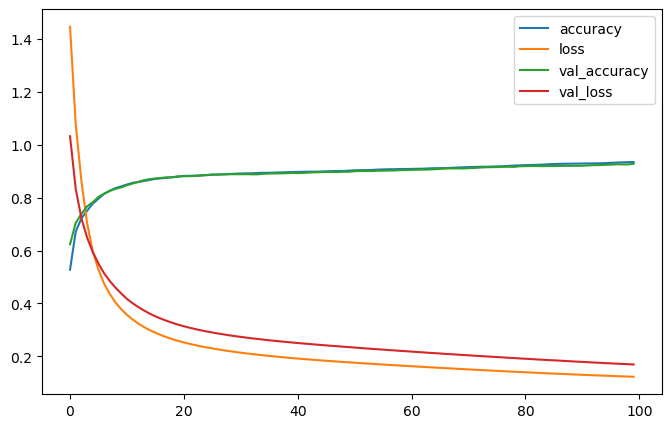

In [12]:
pd.DataFrame(result.history).plot(
    figsize=(8,5)
)
plt.show()

In [13]:
import keras_tuner as kt

#strojenie hiperparametrów
def build_model(hp):
    model = keras.Sequential()
    
    
    units_1 = hp.Int('units_1', min_value=10, max_value=100, step=10)
    model.add(layers.Dense(units_1, input_shape=(13,), activation='relu'))
    
    
    dropout_rate = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
    model.add(layers.Dropout(dropout_rate))
    
    
    add_second_layer = hp.Boolean('add_second_layer')
    if add_second_layer:
        units_2 = hp.Int('units_2', min_value=10, max_value=50, step=10)
        model.add(layers.Dense(units_2, activation='relu'))
        model.add(layers.Dropout(dropout_rate))
    
   
    model.add(layers.Dense(5, activation='softmax'))
    
    
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    
    if optimizer == 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model


tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='hyperparameter_tuning',
    project_name='nursery_ffnn'
)


print("Uruchamianie hyperparameter tuning z class_weight...\n")
tuner.search(
    X_train, y_train, 
    epochs=50, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,  
    verbose=1
)

Reloading Tuner from hyperparameter_tuning/nursery_ffnn/tuner0.json
Uruchamianie hyperparameter tuning z class_weight...



Najlepsze hiperparametry:
- Liczba neuronów w 1. warstwie: 80
- Dropout: 0.0
- Druga warstwa: True
- Liczba neuronów w 2. warstwie: 10
- Optymalizator: rmsprop
- Learning rate: 0.001775


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



WYNIKI NAJLEPSZEGO MODELU
Train Accuracy: 1.0000
Val Accuracy: 1.0000
Test Accuracy: 0.9996


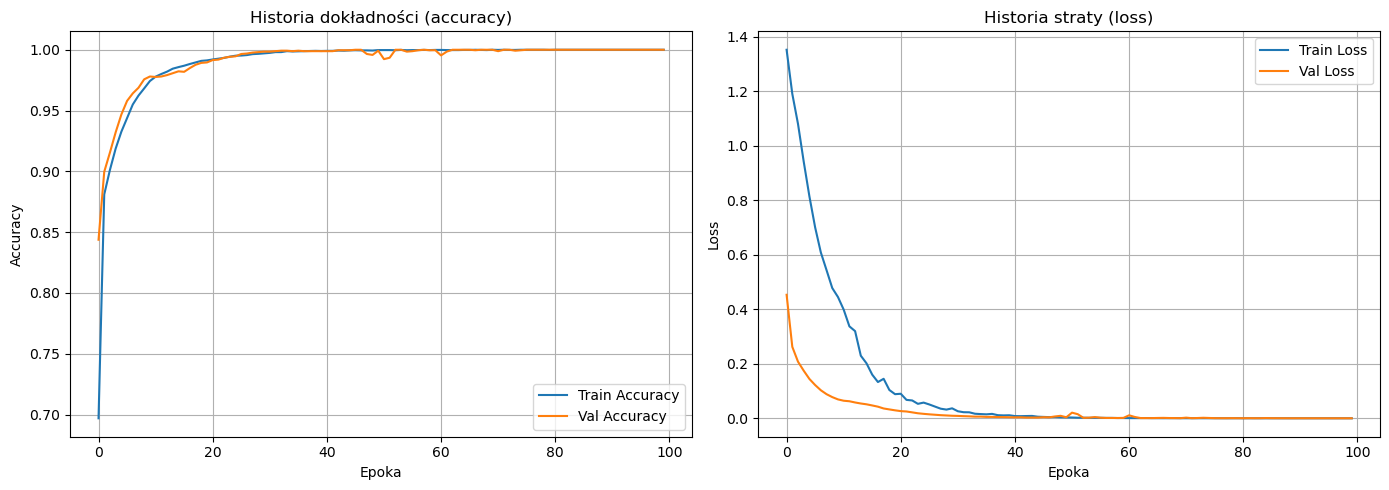

In [14]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Najlepsze hiperparametry:")
print(f"- Liczba neuronów w 1. warstwie: {best_hps.get('units_1')}")
print(f"- Dropout: {best_hps.get('dropout')}")
print(f"- Druga warstwa: {best_hps.get('add_second_layer')}")
if best_hps.get('add_second_layer'):
    print(f"- Liczba neuronów w 2. warstwie: {best_hps.get('units_2')}")
print(f"- Optymalizator: {best_hps.get('optimizer')}")
print(f"- Learning rate: {best_hps.get('learning_rate'):.6f}")

#stworzenie modelu z najlepszymi parametrami
best_model = tuner.hypermodel.build(best_hps)
history_best = best_model.fit(
    X_train, y_train, 
    epochs=100, 
    validation_data=(X_val, y_val),
    class_weight=class_weight_dict,  
    verbose=0
)


print("\n" + "="*60)
print("WYNIKI NAJLEPSZEGO MODELU")
print("="*60)
train_loss, train_accuracy = best_model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))


axes[0].plot(history_best.history['accuracy'], label='Train Accuracy')
axes[0].plot(history_best.history['val_accuracy'], label='Val Accuracy')
axes[0].set_title('Historia dokładności (accuracy)')
axes[0].set_xlabel('Epoka')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)


axes[1].plot(history_best.history['loss'], label='Train Loss')
axes[1].plot(history_best.history['val_loss'], label='Val Loss')
axes[1].set_title('Historia straty (loss)')
axes[1].set_xlabel('Epoka')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()
